# <center> <div style="width: 370px;">  ![Breadth First Search](pictures/Breadth_First_Search.jpg)

# <center> Breadth First Search

## Introduction To Graph

A graph, denoted as G = (V, E), is a fundamental mathematical construct composed of two essential components: a set of vertices, often referred to as nodes, represented as V, and a set of edges, symbolized as E. In this framework, each edge within E constitutes a pair of vertices selected from V. The relationship between a vertex and an edge is defined by adjacency or incidence, meaning that a vertex and an edge are considered connected if the edge encompasses the vertex within its structure.



When we examine vertices u and v, we encounter the concept of edge directionality. An edge is categorized as directed when its vertex pair is ordered, as exemplified by (u, v). Conversely, an edge is deemed undirected when its vertex pair is unordered, often represented as {u, v}, or sometimes indicated as both (u, v) and (v, u). Within a directed edge, such as e = (u, v), it originates from vertex u (known as the tail of e) and terminates at vertex v (known as the head of e). In this context, e is regarded as an incoming edge for vertex v and an outgoing edge for vertex u. In undirected graphs, each edge serves the dual purpose of being incoming and outgoing. The terms "in-degree" and "out-degree" are employed to quantify the number of incoming and outgoing edges connected to a vertex v, respectively. Typically, when discussing degree, it implies out-degree, unless explicitly stated otherwise.



Graphs, as their name suggests, are often depicted graphically. In graphical representations, vertices are visualized as points, while edges are depicted as lines that connect these points. In the case of directed edges, these lines frequently include an arrowhead to denote the direction of the edge, usually located near the edge's head. To illustrate, consider the following examples of a directed graph G1 and an undirected graph G2:




|                  |  Graph Name |    Vertecis        |   Edges                          |
|------------------|-------------|--------------------|----------------------------------|
|Directed Graph G1:|G1 = (V1, E1)|V1 = {0, 1, 2, 3, 4}|E1 = {(0, 1),(1, 2),(2, 0),(3, 4)}|
|Undirected Graph G2:|G2 = (V2, E2)|V2 = {0, 1, 2, 3, 4}|E2 = {{0, 1}, {0, 3}, {0, 4}, {2, 3}}|





# <center> <div style="width: 370px;"> 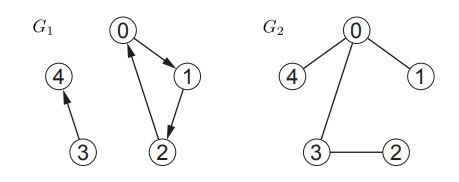


In graph theory, a path, denoted as path1, is a sequential arrangement of vertices (v0, . . . , vk) such that for each ordered pair of vertices (vi, vi+1), there exists an outgoing edge in the graph that connects vi to vi+1. The length of a path is defined as the number of edges it contains, which is one less than the number of vertices traversed. A graph earns the label of "strongly connected" when it boasts a path connecting every node to every other node within the graph. It's worth noting that every connected undirected graph automatically qualifies as strongly connected since every undirected edge incident to a vertex serves the purpose of both incoming and outgoing connections. In the case of directed graph G1, consisting of two connected components, only one of these components can be classified as strongly connected.

## Graph Representation Techniques

In computer science, there are numerous methods for representing a graph in code. The most prevalent approach involves utilizing a Set data structure known as Adj, which maps each vertex `u` to another data structure, `Adj(u)`, storing the adjacent vertices reachable from `u` via a single outgoing edge. This internal data structure is commonly referred to as an "adjacency list." Notably, this representation doesn't explicitly store edge pairs; it exclusively maintains the outgoing neighboring vertices for each vertex.

When vertices are uniquely labeled from `0` to `|V| - 1`, it is customary to house the top-level Set Adj within a direct access array of `length |V|`. Each array slot `i` points to the adjacency list of the vertex labeled `i`. Alternatively, when vertices are not labeled in this manner, a hash table is commonly employed to map each `u ∈ V` to its respective `Adj(u)`. Subsequently, each adjacency list, `Adj(u)`, is typically stored as an unordered array of the outgoing adjacencies.

For instance, consider the following adjacency list representations of `G1` and `G2`. These representations utilize a direct access array for the top-level Set and an array for each adjacency list:

Adjacency List Representation of G1:
```
A1 = [[1],  # 0
     [2],  # 1
     [0],  # 2
     [4],  # 3
     []]   # 4
```

Adjacency List Representation of G2:
```
A2 = [[1, 4, 3],  # 0
     [0],        # 1
     [3],        # 2
     [0, 2],     # 3
     [0]]        # 4
```

Using an array for an adjacency list is a suitable data structure when the primary task is iterating over the edges incident to a vertex. This is the case for most algorithms discussed in this class, and therefore, it is our default implementation. Notably, each edge appears in any adjacency list at most twice, resulting in an adjacency list representation implemented using arrays having a size of `Θ(|V| + |E|)`.

However, one limitation of this representation is that determining whether a graph contains a specific edge `(u, v)` may necessitate `Ω(|V|)` time, as it requires traversing the array representing the adjacency list of `u` or `v`. To mitigate this issue, one can opt for storing adjacency lists using hash tables instead of regular unsorted arrays. This alternative approach supports edge checking in expected `O(1)` time while still utilizing `Θ(|V| + |E|)` space. Nevertheless, for the purposes of our algorithms, we will assume the simpler unsorted-array-based adjacency list representation.

Below, we provide representations of `G1` and `G2` that use hash tables for both the outer Adj Set and the inner adjacency lists `Adj(u)`, employing Python dictionaries:

Adjacency List Representation of G1 (Using Hash Tables):
```
S1 = {0: {1},    # 0
      1: {2},    # 1
      2: {0},    # 2
      3: {4},    # 3
      4: {0}}    # 4
```

Adjacency List Representation of G2 (Using Hash Tables):
```
S2 = {0: {1, 3, 4},  # 0
      1: {0},        # 1
      2: {3},        # 2
      3: {0, 2},     # 3
      4: {0}}        # 4
```

These representations offer an efficient way to work with graphs in code, accommodating a variety of algorithms and operations.

## Graph Applications

- Why? Graphs are everywhere!
- any network system has direct connection to graphs
- e.g., road networks, computer networks, social networks
- the state space of any discrete system can be represented by a transition graph
- e.g., puzzle & games like Chess, Tetris, Rubik’s cube
- e.g., application workflows, specifications 

## Neighbor Sets and Adjacencies



- The outgoing neighbor set of a vertex `u` in `V` is denoted as `Adj+(u)` and defined as `Adj+(u) = {v ∈ V | (u, v) ∈ E}`.
- The incoming neighbor set of a vertex `u` in `V` is represented as `Adj-(u)` and is defined as `Adj-(u) = {v ∈ V | (v, u) ∈ E}`.
- The out-degree of a vertex 'u' in V is given by `deg+(u) = |Adj+(u)|`.
- The in-degree of a vertex 'u' in V is given by `deg-(u) = |Adj-(u)|`.
- For undirected graphs, `Adj-(u)` is equivalent to `Adj+(u)`, and `deg-(u)` equals `deg+(u)`.
- When no superscript is specified, it defaults to "outgoing," meaning `Adj(u) = Adj+(u)` and `deg(u) = deg+(u)`.

## Graph Representations

- To represent a graph `G = (V, E)`, it is necessary to store the outgoing edges `Adj(u)` for all u ∈ V.
- Initially, a Set data structure named Adj is needed to map `u` to `Adj(u)`.
- Subsequently, for each `u`, `Adj(u)` is stored in another data structure known as an adjacency list.
- It is common to use a direct access array or hash table for Adj since fast lookup by vertex is essential.
- Typically, an array or linked list is used for each Adj(u) since iteration is usually the primary operation.
- In the common representations, the size of Adj is `Θ(|V|)`, while the size of each `Adj(u)` is `Θ(deg(u))`.

## Graph Storage Space

- Given that, according to the handshaking lemma, `u∈V deg(u) ≤ 2|E|`, a graph can be stored in `Θ(|V| + |E|)` space.
- Consequently, for graph algorithms, linear time implies `Θ(|V| + |E|)`, which is linear in the size of the graph.

## Examples

- Examples 1 and 2 assume vertices are labeled from {0, 1, . . . , |V| − 1}, enabling the use of a direct access array for Adj and storing Adj(u) in an array.
- Example 3 employs a hash table for Adj.


Example 1 (Undirected):
``` python
G1 = [
  [2, 1],  # 0
  [2, 0, 3],  # 1
  [1, 3, 0],  # 2
  [1, 2],  # 3
]
```

Example 2 (Directed):
``` python
G2 = [
  [2],  # 0
  [2, 0],  # 1
  [0],  # 2
]

```

Example 3 (Undirected):
``` python
G3 = {
  a: [s, b],
  b: [a],
  s: [a, c],
  c: [s, d, e],
  d: [c, e, f],
  e: [c, d, f],
  f: [d, e],
  g: [],
}
```

> **note** that in an undirected graph, connections are symmetric because every edge is traversed in both directions.

## Paths

- A path is defined as a sequence of vertices `p = (v1, v2, . . . , vk)` where `(vi, vi+1) ∈ E for all 1 ≤ i < k`.
- A path is considered simple if it doesn't repeat vertices.
- The length (p) of a path `p` is the number of edges it contains.
- The distance `δ(u, v)` from vertex `u` in `V` to vertex `v` in `V` is the minimum length of any path from `u` to `v`, i.e., the length of the shortest path from `u` to `v` (by convention, `δ(u, v) = ∞ if u is not connected to v`).

### Shortest Paths Tree

- To find the shortest path from a source vertex `s` to every other vertex in the graph, we store a parent `P(v)` for each vertex `v`.
- `P(v)` represents the second-to-last vertex on the shortest path from `s` to `v`.
- `P(s)` is set to null since there is no second-to-last vertex on the shortest path from `s` to `s`.
- The set of parents forms a shortest paths tree with a size of `O(|V|)`, representing the reversed shortest paths from every vertex reachable from `s` back to `s`.

## Twitter Influence

Twitter allows users to follow each other in order to view their posts.

- Following is a one-way connection (e.g., I can follow you, but you are not required to follow me in return).

Now, let's establish a definition of influence: A user is considered influential if they have a significant number of followers-of-followers.

- The rationale behind this definition is that influence is not solely determined by how many people follow you, but rather by whether those who follow you have a broad reach themselves.

We need to write a function called `mostInfluential` that takes input from a file containing Twitter relationships and identifies the most influential user.

The function's purpose is to analyze Twitter relationships and determine which user has the highest degree of influence based on the defined criteria.

**cool application of graphs [HERE](https://towardsdatascience.com/analyzing-twitter-user-network-1cfcef1dd89d) and [HEAR](https://www.sciencedirect.com/science/article/abs/pii/S095741742030779X)**

# Breadth-First Searsh (BFS)

Breadth-First Search (BFS)

When dealing with graphs, a common task is to determine the vertices that are reachable from a given starting vertex, denoted as 's.' Breadth-First Search (BFS) is a fundamental algorithm for achieving this goal. BFS efficiently discovers sets of vertices organized by levels, where each level represents vertices reachable from 's' via a shortest path of a specific length, and these levels are uncovered in increasing order. In essence, it explores the graph layer by layer, starting from 's' and moving outward in terms of shortest path length.

The process begins with level L0, which consists of only 's' itself because the only vertex reachable from 's' with a path length of 0 is 's' (L0 = {s}). Subsequently, to compute level Li+1, we include every vertex that has an incoming edge from a vertex in level Li, provided that it hasn't already been assigned a level. By computing each level based on the preceding one, we effectively build a growing frontier of vertices, exploring them in accordance with their shortest path length from 's.'

Below, you'll find Python code that implements BFS for a graph represented using index-labeled adjacency lists. This code returns a parent label for each vertex, pointing the way along the shortest path back to 's.' The parent labels collectively form a BFS tree, which contains some shortest path from 's' to every other vertex in the graph.

```python
def bfs(Adj, s):                         # Adj: adjacency list, s: starting vertex
    parent = [None for v in Adj]         # O(V) (use hash if unlabeled)
    parent[s] = s                        # O(1) root
    level = [[s]]                        # O(1) initialize levels
    while 0 < len(level[-1]):            # O(?) last level contains vertices
        level.append([])                 # O(1) amortized, make a new level
        for u in level[-2]:              # O(?) loop over the last full level
            for v in Adj[u]:             # O(Adj[u]) loop over neighbors
                if parent[v] is None:    # O(1) parent not yet assigned
                    parent[v] = u        # O(1) assign parent from level[-2]
                    level[-1].append(v)  # O(1) amortized, add to the border
    return parent
```

Now, let's analyze the efficiency of BFS. Specifically, how many times does the inner loop on lines 9–11 execute? A crucial point to note is that a vertex is added to any level at most once in line 11. Consequently, the loop in line 7 processes each vertex 'v' at most once. Within the loop on line 8, we cycle through all outgoing edges from vertex 'v,' which totals deg(v) edges. Therefore, the inner loop is repeated at most O(deg(v)) = O(|E|) times.

Since the parent array returned has a length of |V|, it follows that breadth-first search operates in O(|V| + |E|) time, making it a highly efficient algorithm for exploring graphs and determining reachable vertices.

**in C++ languge:**
``` cpp
#include <vector>
#include <queue>

std::vector<int> bfs(std::vector<std::vector<int>>& Adj, int s) {
    int V = Adj.size();                           // Number of vertices
    std::vector<int> parent(V, -1);               // Initialize parent array
    parent[s] = s;                                // Root vertex

    std::vector<std::vector<int>> levels;         // Vector to store levels
    levels.push_back({s});                        // Initialize with the starting vertex

    while (!levels.back().empty()) {              // Last level contains vertices
        levels.push_back({});                     // Make a new level

        for (int u : levels[levels.size() - 2]) { // Loop over the last full level
            for (int v : Adj[u]) {                // Loop over neighbors
                if (parent[v] == -1) {            // Parent not assigned yet
                    parent[v] = u;                // Assign parent from the previous level
                    levels.back().push_back(v);   // Add to the border
                }
            }
        }
    }

    return parent;
}
```

## BFS Details

- Idea: processing a node involves knowing we need to visit all its neighbors
- Need to keep a TODO list of nodes to process

**How?** 
- Keep a Queue of nodes as our TODO list
- Idea: dequeue a node, enqueue all its neighbors
- Still will return the same nodes as reachable, just might have shorter paths

In a graph with n nodes and m edges, BFS operates in O(m + n) time when using an adjacency list representation. This is because it visits each edge once and each node at most once.

### BFS from v1 to v2

1. Create a queue of vertices to visit, initially containing only v1.
2. Mark v1 as visited.
3. While the queue is not empty and v2 has not been seen:
    - Dequeue a vertex v from the queue.
    - Mark vertex v as visited.
    - Add each unvisited neighbor n of v to the queue.
How can we modify the pseudocode to search for a specific path?

- To adapt the pseudocode for finding a specific path, we can stop the BFS once we reach v2 and store the path as we traverse it. This modified BFS can be designed to terminate when the desired path is found.


### Optimality

- BFS always finds the shortest path in terms of the fewest edges.
- In unweighted graphs, BFS finds the path with the optimal cost.
- In weighted graphs, BFS does not always guarantee an optimal cost path.

### Retrieval

- Reconstructing the actual sequence of vertices or edges in the path can be challenging in BFS.
- Since BFS explores many possible paths in parallel, it's not straightforward to maintain a path array/list in progress.
- A solution is to keep track of predecessors for each vertex, where each vertex stores a reference to its previous vertex.

## Exercise

We can use parent labels returned by a breadth-first search to construct a shortest path from a vertex `s` to vertex `t`, following parent pointers from `t` backward through the graph to `s`. Below is Python code to compute the shortest path from `s` to `t` which also runs in worst-case `O(|V | + |E|)` time. 

In [1]:
# Helper function: BFS to compute parent labels
def bfs(Adj, s):
    parent = [None for v in Adj]
    parent[s] = s
    queue = [s]

    while queue:
        v = queue.pop(0)
        for u in Adj[v]:
            if parent[u] is None:
                parent[u] = v
                queue.append(u)

    return parent

# Function to compute the shortest path from 's' to 't'
def unweighted_shortest_path(Adj, s, t):
    parent = bfs(Adj, s)

    if parent[t] is None:
        return None  # No path from 's' to 't'

    i = t
    path = [t]

    while i != s:
        i = parent[i]
        path.append(i)

    return path[::-1]  # Return reversed path


In [2]:
# Adjacency list for a simple undirected graph with 5 vertices
Adj = {
    0: [1],       # Vertex 0 is connected to vertex 1
    1: [0, 2, 3, 4], # Vertex 1 is connected to vertices 0, 2, 3, and 4
    2: [1],       # Vertex 2 is connected to vertex 1
    3: [1],       # Vertex 3 is connected to vertex 1
    4: [1]        # Vertex 4 is connected to vertex 1
}


In [3]:
# Example usage:
s_vertex = 0  # Starting vertex
t_vertex = 3  # Target vertex
shortest_path = unweighted_shortest_path(Adj, s_vertex, t_vertex)
print("Shortest path from vertex", s_vertex, "to vertex", t_vertex, ":", shortest_path)


Shortest path from vertex 0 to vertex 3 : [0, 1, 3]


In [4]:
import random

# Function to generate a random graph represented as an adjacency list
def generate_random_graph(num_vertices, max_edges_per_vertex):
    Adj = {vertex: [] for vertex in range(num_vertices)}
    
    for vertex in range(num_vertices):
        num_edges = random.randint(1, max_edges_per_vertex)
        for _ in range(num_edges):
            neighbor = random.randint(0, num_vertices - 1)
            if neighbor != vertex and neighbor not in Adj[vertex]:
                Adj[vertex].append(neighbor)
                Adj[neighbor].append(vertex)  # For an undirected graph
    
    return Adj

# Example usage:
num_vertices = 1000  # Adjust the number of vertices as needed
max_edges_per_vertex = 10  # Adjust the maximum edges per vertex as needed

random_graph = generate_random_graph(num_vertices, max_edges_per_vertex)


In [7]:
# if you want to see graph:
# print(random_graph)

In [6]:
# Example usage:
s_vertex = 0  # Starting vertex
t_vertex = 3  # Target vertex
shortest_path = unweighted_shortest_path(random_graph, s_vertex, t_vertex)
print("Shortest path from vertex", s_vertex, "to vertex", t_vertex, ":", shortest_path)


Shortest path from vertex 0 to vertex 3 : [0, 656, 563, 3]


## Exercise

Given an unweighted graph G = (V, E), find a shortest path from vertex s to vertex t that has an odd number of edges.

### Solution

1. Construct a New Graph G0:
    - For every vertex `u` in `V`, construct two vertices `uE` and `uO` in `V0`, representing reaching the vertex u through an even and odd number of edges, respectively.
2. Modify the Edges:
    - For every edge `(u, v)` in `E`, construct two edges in `E0: (uE, vO)` and `(uO, vE)`.
3. Run Breadth-First Search on G0:
    - Start a breadth-first search (BFS) on G0 from vertex sE to find the shortest path from sE to tO.
**Explanation:**
Because G0 is bipartite between even and odd vertices, even paths from sE will always end at even vertices, and odd paths will end at odd vertices. Therefore, finding a shortest path from sE to tO will represent a path of odd length in the original graph.

**Time Complexity:**
Constructing G0 and running breadth-first search (BFS) from sE each take` O(|V| + |E|)` time, where `|V|` is the number of vertices and `|E|` is the number of edges in the original graph G.
This approach ensures that you can find a shortest path from s to t with an odd number of edges efficiently in an unweighted graph.





